In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Kesehatan_Anak.csv',sep=';')
df.head()

,Provinsi,Keluhan,Jamkesda,rokok,imunisasi,masihasi,asieksklusif,makanan
0,Aceh,34.58,94.87,0.56,22.52,82.38,65.88,54.05
1,Sumatera Utara,29.13,50.97,0.49,42.44,70.34,57.17,54.07
2,Sumatera Barat,26.50,63.85,1.41,39.25,81.29,74.32,57.89
3,Riau,26.03,61.05,0.69,44.44,80.23,69.51,55.31
4,Jambi,24.21,49.00,1.32,53.94,80.30,72.68,51.37


In [ ]:
# Tipe data
df.tail()

,Provinsi,Keluhan,Jamkesda,rokok,imunisasi,masihasi,asieksklusif,makanan
29,Sulawesi Barat,25.14,81.79,1.46,54.88,77.24,74.67,39.57
30,Maluku,15.53,47.78,0.55,60.46,71.90,59.62,37.77
31,Maluku Utara,14.34,61.34,0.69,50.80,71.90,68.83,33.63
32,Papua Barat,18.48,59.08,1.06,54.66,68.82,61.79,34.72
33,Papua,13.03,78.11,0.65,46.21,67.59,74.18,43.52


In [ ]:
# Check missing values
df.isnull().sum()

Provinsi        0
Keluhan         0
Jamkesda        0
rokok           0
imunisasi       0
masihasi        0
asieksklusif    0
makanan         0
dtype: int64

In [ ]:
df= df.dropna()

In [ ]:
# Check duplicate
dups = df.duplicated()
print(dups.any())
print(df[dups])

False
Empty DataFrame
Columns: [Provinsi, Keluhan, Jamkesda, rokok, imunisasi, masihasi, asieksklusif, makanan]
Index: []


In [ ]:
# Dimensi (ukuran) data
df.shape

(34, 9)

In [ ]:
index = 'Provinsi'
cont_cols = ['Keluhan', 'Jamkesda', 'rokok', 'imunisasi', 'masihasi', 'asieksklusif', 'makanan']
dis_cols = list(set(df.columns) - set([*cont_cols, index]))

len(cont_cols), len(dis_cols)

(7, 0)

In [ ]:
df.describe()

,Keluhan,Jamkesda,rokok,imunisasi,masihasi,asieksklusif,makanan
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,26.356176,64.709706,1.141176,62.182941,74.805000,69.208824,52.015882
std,6.770269,11.790135,0.548363,13.527469,6.113422,7.258185,10.350378
min,13.030000,47.780000,0.310000,22.520000,62.620000,53.600000,33.630000
25%,21.860000,56.475000,0.660000,53.647500,70.490000,63.510000,42.432500
50%,25.805000,61.730000,1.150000,67.725000,74.275000,69.615000,54.060000
75%,31.465000,72.120000,1.522500,71.840000,80.222500,75.577500,60.665000
max,41.650000,94.870000,2.300000,83.890000,84.520000,79.690000,72.540000


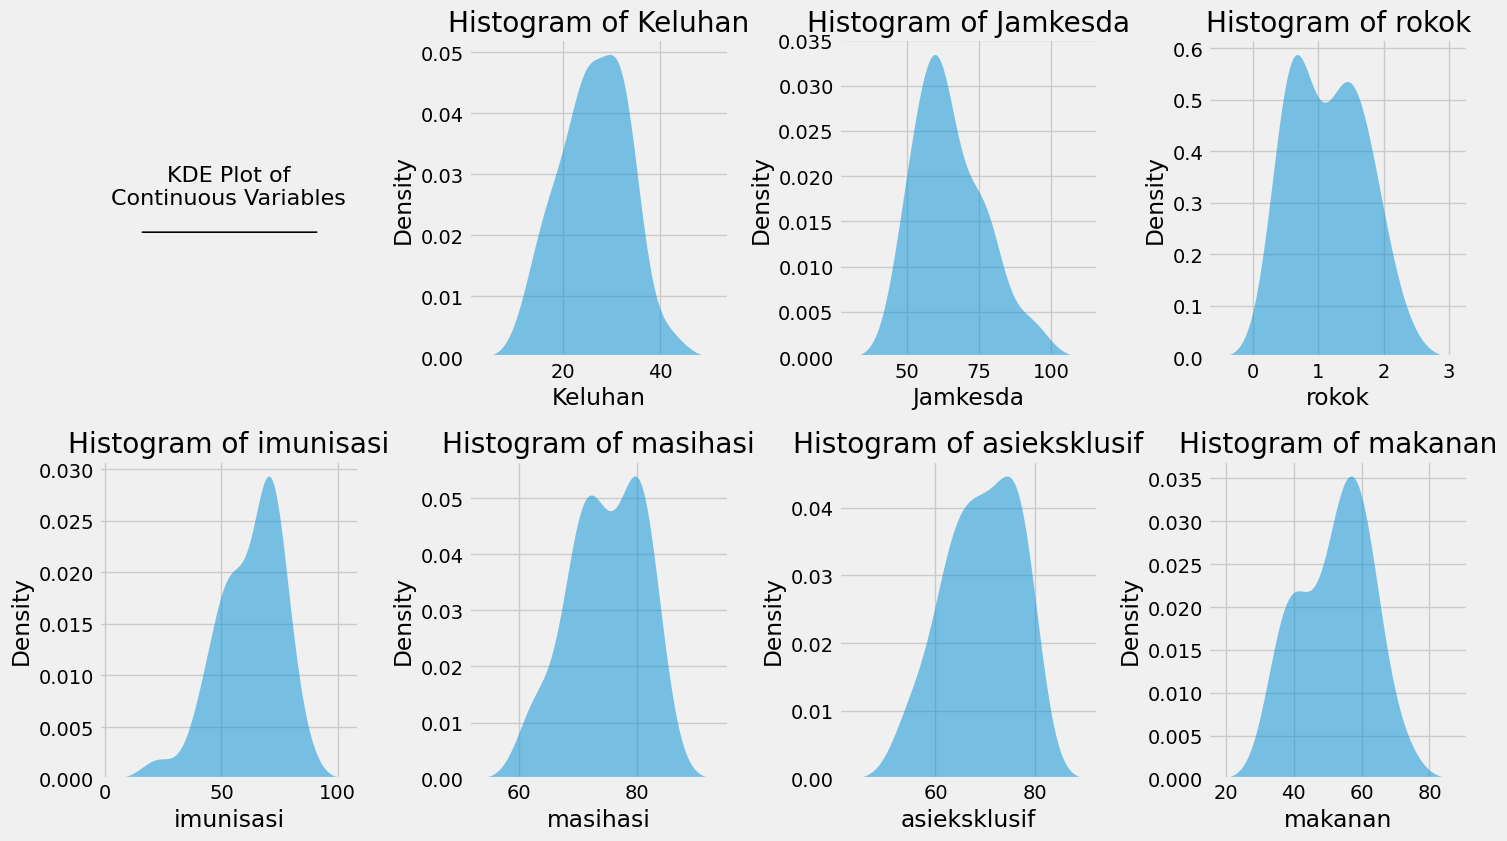

In [ ]:
def mPlotter(nrows, ncols, figsize, title):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    # Use the first subplot for the title
    axes[0].text(0.5, 0.5, title, ha='center', va='center', fontsize=16, transform=axes[0].transAxes)
    axes[0].axis('off')  # Hide the first subplot

    # Define a color palette
    palette = sns.color_palette("viridis", 2)  # Assuming two categories: 'Yes' and 'No'

    return fig, axes[1:], palette  # Return axes[1:] to skip the first subplot

# Use mPlotter to create figure, axes and palette
fig, axes, palette = mPlotter(2, 4, (15, 9), 'KDE Plot of\nContinuous Variables\n________________')

# Loop through the columns and plot each histogram
for col, ax in zip(cont_cols, axes):
    sns.kdeplot(data=df, x=col, multiple='stack', ax=ax, alpha=0.5, linewidth=0)
    ax.set_title(f'Histogram of {col}')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


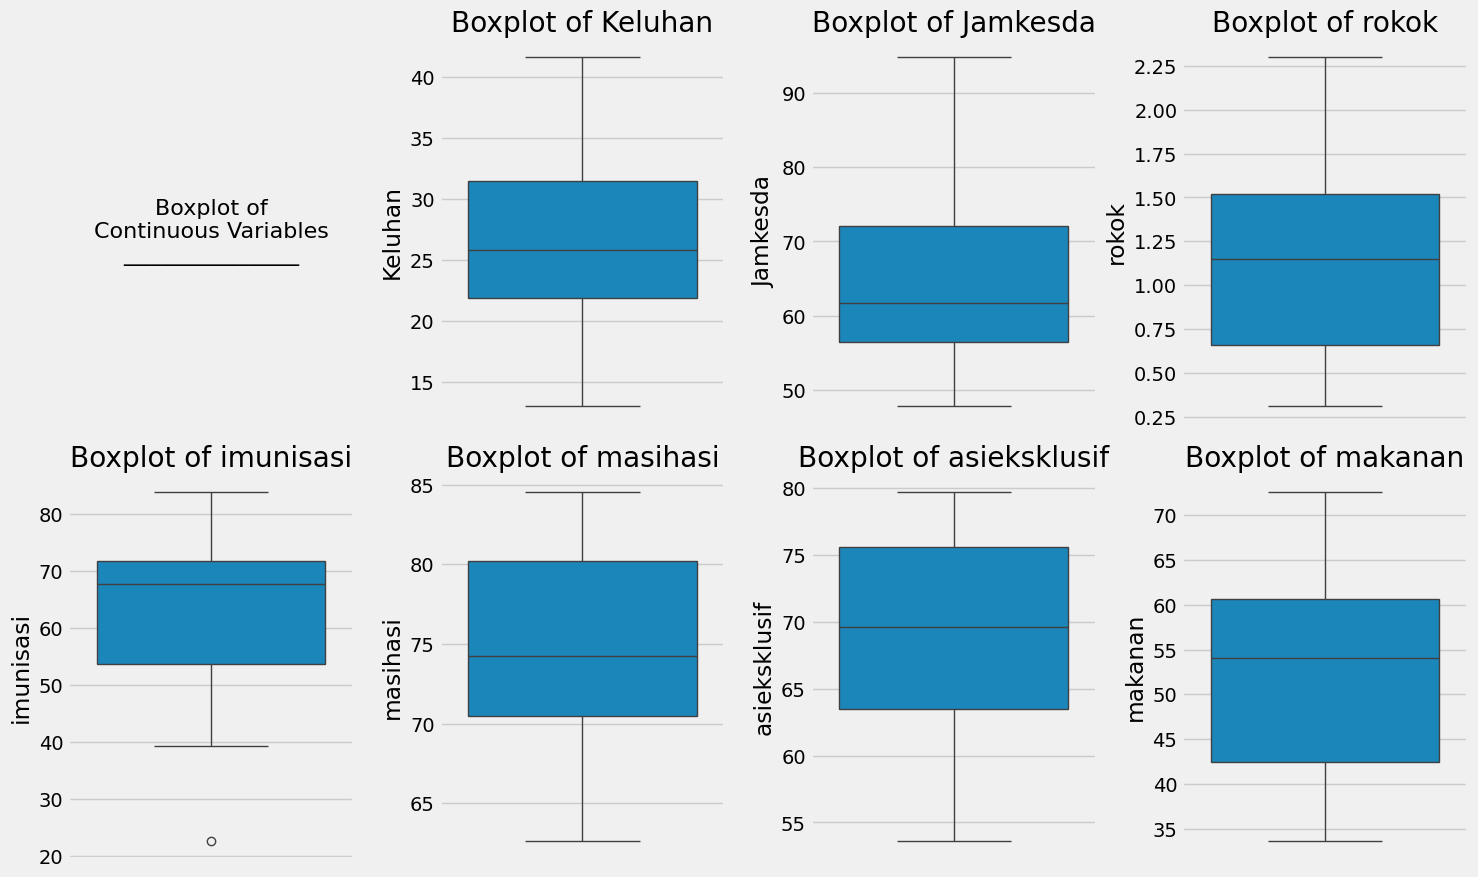

In [ ]:
def mPlotter(nrows, ncols, figsize, title):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    # Use the first subplot for the title
    axes[0].text(0.5, 0.5, title, ha='center', va='center', fontsize=16, transform=axes[0].transAxes)
    axes[0].axis('off')  # Hide the first subplot

    # Define a color palette
    palette = sns.color_palette("viridis", 2)  # Assuming two categories: 'Yes' and 'No'

    return fig, axes[1:], palette  # Return axes[1:] to skip the first subplot

# Use mPlotter to create figure, axes and palette
fig, axes, palette = mPlotter(2, 4, (15, 9), 'Boxplot of\nContinuous Variables\n________________')

# Loop through the columns and plot each boxplot
for col, ax in zip(cont_cols, axes):
    sns.boxplot(data=df , y=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


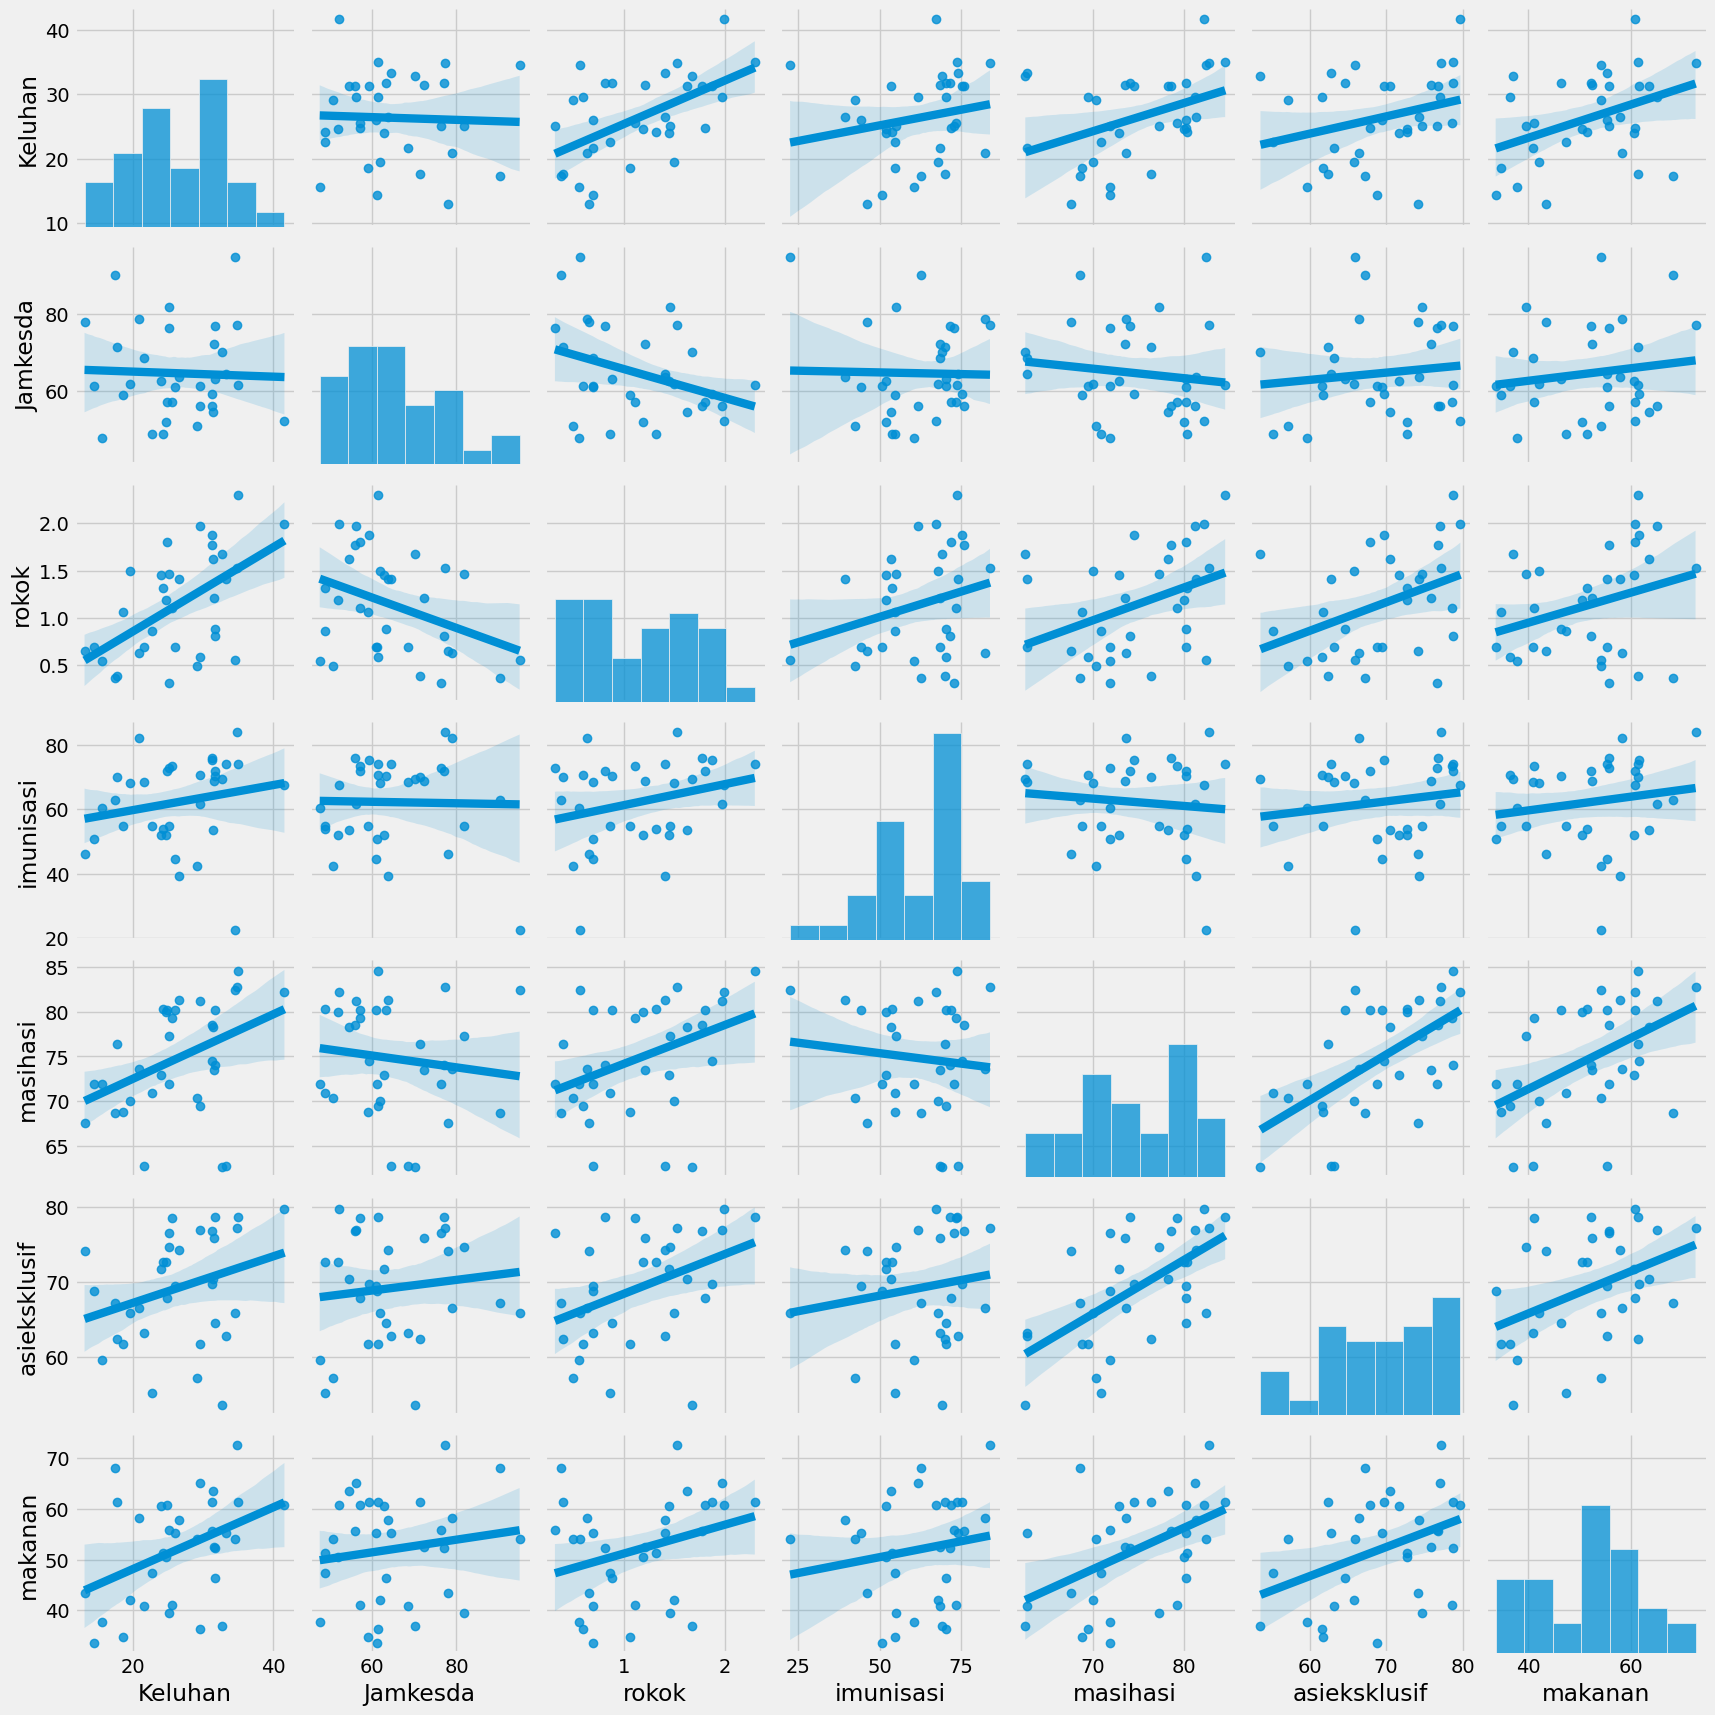

In [ ]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns

# with regression
sns.pairplot(df[cont_cols], kind="reg")
plt.show()

In [ ]:
!pip install kneed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn import metrics

In [ ]:
X=np.asarray(df[cont_cols])
X

array([[34.58, 94.87,  0.56, 22.52, 82.38, 65.88, 54.05],
       [29.13, 50.97,  0.49, 42.44, 70.34, 57.17, 54.07],
       [26.5 , 63.85,  1.41, 39.25, 81.29, 74.32, 57.89],
       [26.03, 61.05,  0.69, 44.44, 80.23, 69.51, 55.31],
       [24.21, 49.  ,  1.32, 53.94, 80.3 , 72.68, 51.37],
       [31.36, 54.76,  1.62, 53.55, 78.25, 70.46, 63.52],
       [24.77, 57.32,  1.8 , 71.87, 80.2 , 67.84, 60.72],
       [31.23, 56.1 ,  1.77, 75.98, 78.53, 76.76, 55.65],
       [33.33, 64.48,  1.41, 74.12, 62.78, 62.77, 55.26],
       [17.69, 71.4 ,  0.39, 70.05, 76.35, 62.4 , 61.41],
       [17.38, 90.23,  0.37, 62.77, 68.64, 67.22, 68.1 ],
       [29.53, 56.21,  1.97, 61.7 , 81.24, 77.  , 65.07],
       [35.03, 61.57,  2.3 , 73.89, 84.52, 78.71, 61.33],
       [34.82, 77.22,  1.53, 83.89, 82.77, 77.16, 72.54],
       [31.26, 59.38,  1.87, 75.29, 74.51, 69.72, 61.45],
       [24.02, 62.81,  1.45, 51.98, 72.92, 71.7 , 60.5 ],
       [20.81, 78.87,  0.63, 82.22, 73.61, 66.52, 58.19],
       [41.65,

In [ ]:
# Transformasi data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 9,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 8) :
    km = KMeans(n_clusters=k, **kmeans_kwargs)
    km = km.fit(X_scaled)
    sse.append(km.inertia_)

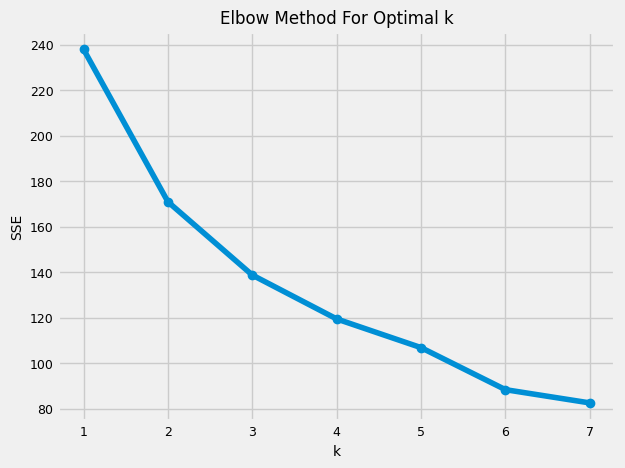

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 8), sse, 'o-')
plt.xlabel('k', size=10)
plt.ylabel('SSE', size=10)
plt.title('Elbow Method For Optimal k', size=12)
plt.xticks(size=9)
plt.yticks(size=9)
plt.show()

In [ ]:
kl = KneeLocator(
    range(1, 8), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [ ]:
model_kmeans_3=KMeans(n_clusters=3)
model_kmeans_3.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
df1= df.iloc[:,1:8]

In [ ]:
df1['Cluster'] = model_kmeans_3.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df1

,Keluhan,Jamkesda,rokok,imunisasi,masihasi,asieksklusif,makanan,Cluster
0,34.58,94.87,0.56,22.52,82.38,65.88,54.05,1
1,29.13,50.97,0.49,42.44,70.34,57.17,54.07,2
2,26.50,63.85,1.41,39.25,81.29,74.32,57.89,0
3,26.03,61.05,0.69,44.44,80.23,69.51,55.31,1
4,24.21,49.00,1.32,53.94,80.30,72.68,51.37,0
5,31.36,54.76,1.62,53.55,78.25,70.46,63.52,0
6,24.77,57.32,1.80,71.87,80.20,67.84,60.72,0
7,31.23,56.10,1.77,75.98,78.53,76.76,55.65,0
8,33.33,64.48,1.41,74.12,62.78,62.77,55.26,2
9,17.69,71.40,0.39,70.05,76.35,62.40,61.41,1


In [ ]:
# Menghitung rata-rata tiap fitur untuk setiap cluster
cluster_means = df1.groupby('Cluster').mean()

print(cluster_means)


           Keluhan   Jamkesda     rokok  imunisasi   masihasi  asieksklusif  \
Cluster                                                                       
0        29.854000  59.701333  1.561333  64.858000  79.315333     73.848667   
1        23.494444  78.862222  0.652222  58.637778  74.670000     70.628889   
2        23.685000  59.485000  0.951000  61.361000  68.161000     60.971000   

           makanan  
Cluster             
0        57.421333  
1        54.240000  
2        41.906000  


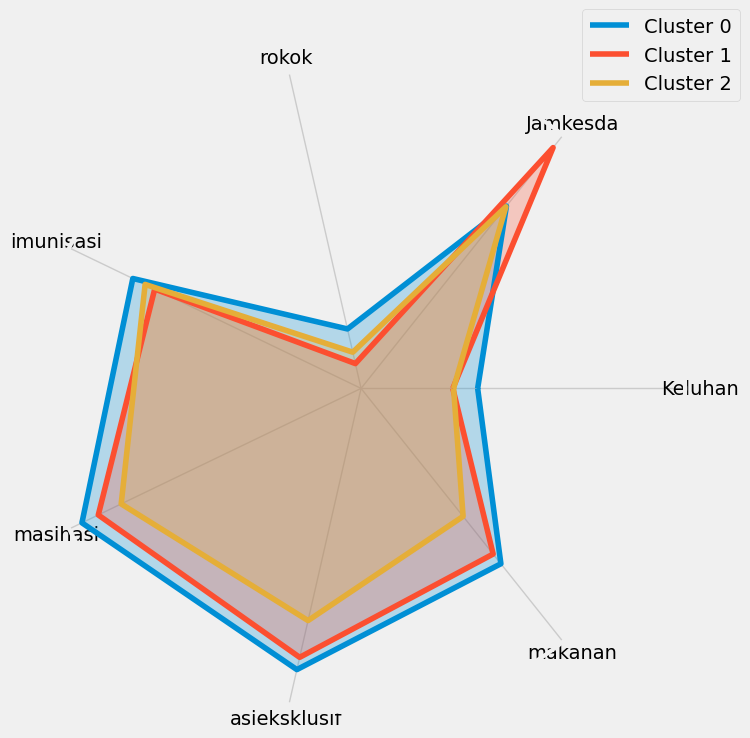

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Menghitung rata-rata untuk setiap cluster
label_means = df1.groupby('Cluster').mean()

import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Menghitung rata-rata untuk setiap cluster
label_means = df1.groupby('Cluster').mean()

# Mengalikan variabel rokok dengan 10 agar lebih terlihat
label_means['rokok'] = label_means['rokok'] * 10

# Data untuk radar chart
labels = label_means.columns
num_vars = len(labels)

# Mengatur sudut untuk radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Menutup plot
angles += angles[:1]

# Membuat radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot setiap cluster
for i, row in label_means.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.25)

# Menambahkan label fitur
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
# Remove radial labels
ax.yaxis.set_visible(False)
# Menambahkan legenda
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

In [ ]:
df1['Provinsi'] = df['Provinsi']

In [ ]:
# Mengelompokkan data berdasarkan cluster dan menyimpan ke dictionary
clustered_provinces_dict = df1.groupby('Cluster')['Provinsi'].apply(list).to_dict()

# Menampilkan hasil
for cluster, provinces in clustered_provinces_dict.items():
    print(f'Cluster {cluster}: {provinces}')

Cluster 0: ['Sumatera Barat', 'Jambi', 'Sumatera Selatan', 'Bangkulu', 'Lampung', 'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 'Jawa Timur', 'Banten', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Kalimantan Barat', 'Kalimantan Selatan', 'Sulawesi Selatan']
Cluster 1: ['Aceh', 'Riau', 'Kep. Riau', 'DKI Jakarta', 'Bali', 'Kalimantan Timur', 'Kalimantan Utara', 'Sulawesi Barat', 'Papua']
Cluster 2: ['Sumatera Utara', 'Kep. Bangka Belitung', 'Kalimantan Tengah', 'Sulawesi Utara', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Gorontalo', 'Maluku', 'Maluku Utara', 'Papua Barat']


In [ ]:
df1['Cluster'].value_counts()

Cluster
0    15
2    10
1     9
Name: count, dtype: int64

In [ ]:
# Menyimpan dataframe ke file Excel
output_file = 'clustered_data.xlsx'
df1.to_excel(output_file, index=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Akurasi model: 1.00


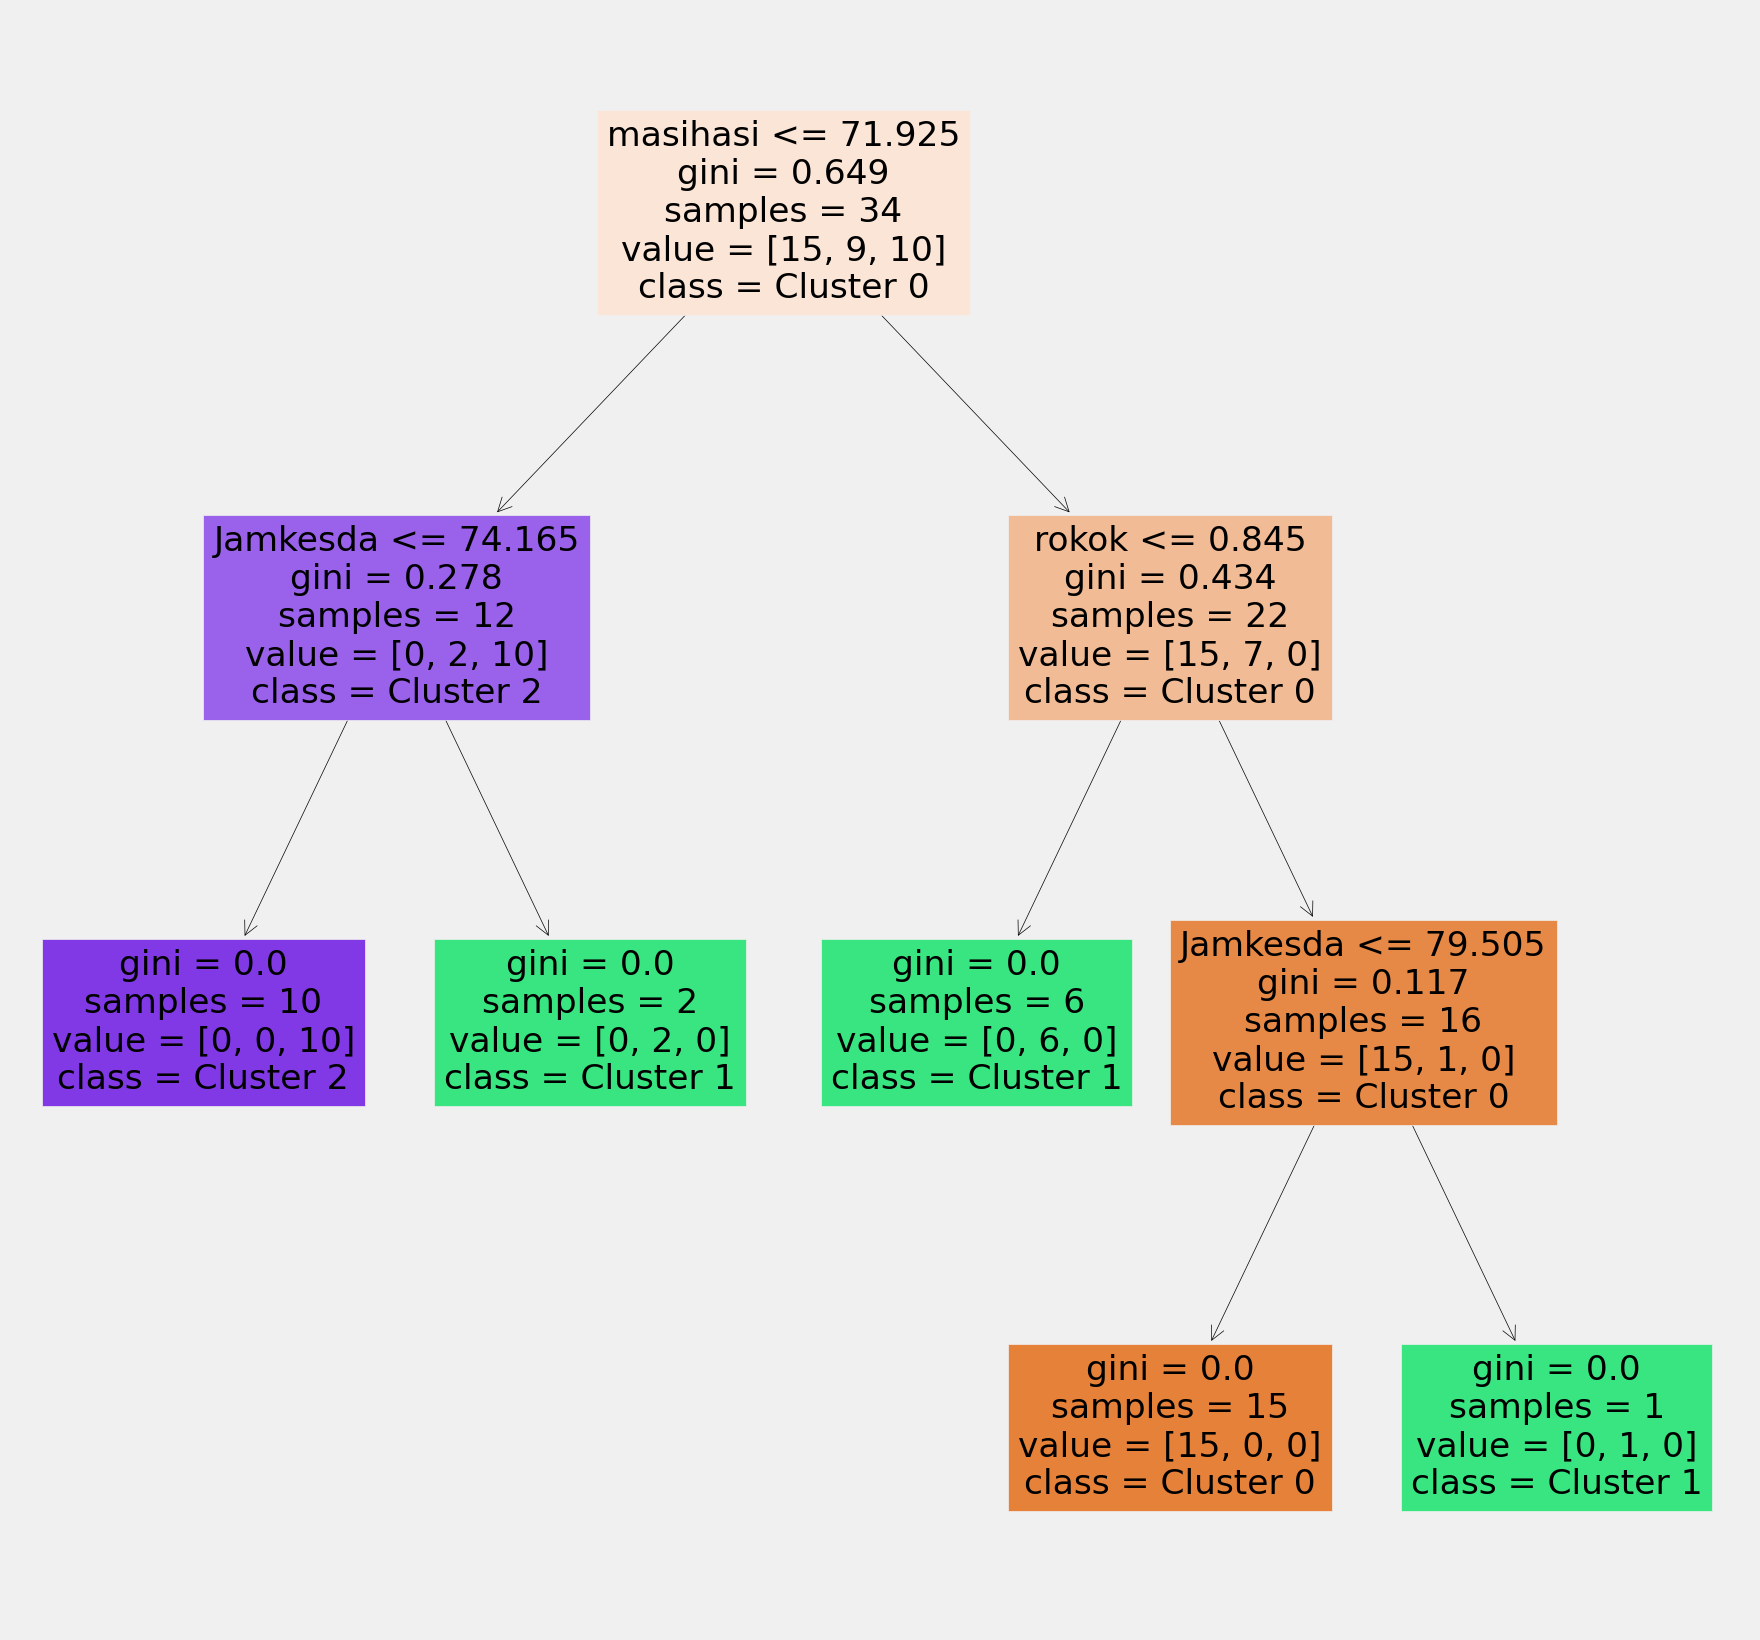

In [ ]:
# Menyiapkan data untuk decision tree
X = df1[cont_cols]
y = df1['Cluster']

# Melatih model decision tree
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# Membuat prediksi pada dataset yang sama
y_pred = clf.predict(X)

# Menghitung akurasi
accuracy = accuracy_score(y, y_pred)
print(f'Akurasi model: {accuracy:.2f}')

# Memvisualisasikan decision tree
from sklearn import tree

plt.figure(figsize=(20,20))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'], filled=True)
plt.show()